In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend 
from matplotlib import font_manager
from matplotlib import gridspec
import seaborn as sns
import scanpy as sc
import yaml
from pathlib import Path
import warnings
from collections import Counter
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list

warnings.filterwarnings('ignore')

from scripts.atlas_plots import AtlasPlotting


In [ ]:
#adata = sc.read_h5ad("/mnt/storage/Daniele/atlases/mouse/Mouse_Atlas_Harmonised_PP_updated_annot.h5ad")
adata = sc.read_h5ad("/mnt/storage/Daniele/atlases/mouse/Mouse_Atlas_Harmonised.h5ad")


In [ ]:
adata

AnnData object with n_obs × n_vars = 602670 × 32479
    obs: 'Sample_ID', 'Condition', 'Treatment', 'TreatmentType', 'TreatmentStatus', 'Tissue', 'Sex', 'Dataset', 'Technology', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Model', 'Barcoded', 'Strain', 'Genotype', 'Larry_positive', 'Provenance'
    var: 'manual_gene'
    uns: 'Level_1_final_colors', 'Level_1_refined_colors', 'Level_2_colors', 'Level_2_final_colors', 'Level_3_colors', 'Level_3_final_colors', 'Level_4_final_colors', 'Level_4_knn_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'Cell_filtering', 'DRVI_emb', 'X_pca', 'X_scANVI', 'X_umap', 'X_umap_circle', 'batch', 'bin_edges', 'expiMAP_emb', 'leiden', 'leiden_0.5', 'leiden_1.0', 'leiden_1.5', 'leiden_endothelial_level_1', 'leiden_epithelial_level_1', 'leiden_fibroblast_level_1', 'leiden_lymphoid_level_1', 'leiden_myeloid_level_1', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_hb', 'log1p_total_counts_malat', 'log1p_total_counts_mt', 'log1p_total_count

In [ ]:
print(adata.obs["Dataset"].unique())

['in_house', 'Chen_2024', 'Donahue_2024', 'Rupert_2025', 'Chen_2021', 'Carstens_2021', 'Han_2023', 'Erdem_2024']
Categories (8, object): ['Carstens_2021', 'Chen_2021', 'Chen_2024', 'Donahue_2024', 'Erdem_2024', 'Han_2023', 'Rupert_2025', 'in_house']


In [ ]:
adata.obs["Model"] = adata.obs["Model"].replace("implantation", "orthotopic")

In [ ]:
adata.obs["Data_Source"] = np.where(adata.obs["Dataset"] == "in_house", "in house", "public data")

In [ ]:
adata

AnnData object with n_obs × n_vars = 602670 × 32479
    obs: 'Sample_ID', 'Condition', 'Treatment', 'TreatmentType', 'TreatmentStatus', 'Tissue', 'Sex', 'Dataset', 'Technology', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Model', 'Barcoded', 'Strain', 'Genotype', 'Larry_positive', 'Provenance', 'Data_Source'
    var: 'manual_gene'
    uns: 'Level_1_final_colors', 'Level_1_refined_colors', 'Level_2_colors', 'Level_2_final_colors', 'Level_3_colors', 'Level_3_final_colors', 'Level_4_final_colors', 'Level_4_knn_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'Cell_filtering', 'DRVI_emb', 'X_pca', 'X_scANVI', 'X_umap', 'X_umap_circle', 'batch', 'bin_edges', 'expiMAP_emb', 'leiden', 'leiden_0.5', 'leiden_1.0', 'leiden_1.5', 'leiden_endothelial_level_1', 'leiden_epithelial_level_1', 'leiden_fibroblast_level_1', 'leiden_lymphoid_level_1', 'leiden_myeloid_level_1', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_hb', 'log1p_total_counts_malat', 'log1p_total_counts_mt', 'lo

In [ ]:

figgen = AtlasPlotting("config/config.yml",output_dir="/mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5")



In [ ]:
masked_plot = {
    "CD4+ T Cells": ["CD4+ Naive T Cell", "CD4+ Th1 Cell", "CD4+ Th2 Cell", "CD4+ Th17 Cell",
            "CD4+ Th22 Cell", "T-reg", "CD4+ Memory T Cell"],
    "CD8+ T Cells": ["CD8+ Naive T Cell", "CD8+ Effector T Cell", "CD8+ Terminal Effector T Cell",
            "CD8+ Exhausted T Cell", "CD8+ Tissue-Resident Memory T Cell", "CD8+ Memory T Cell"],
    "Mixed T Cells": ["Double Positive CD4+CD8+ T Cell", "γδ T Cell (Vδ1)"],
    "Malignant Cells": ["Malignant Cell - Pit Like", "Malignant Cell - Acinar-like", "Malignant Cell - Epithelial",
            "Malignant Cell - Hypoxia", "Malignant Cell - EMT", "Malignant Cell - Highly Proliferative",
            "Malignant Cell - Mesenchymal", "Malignant Cell - Highly Invasive", "Malignant Cell - Senescence",
            "Malignant Cell - Apoptotic"],
    "Macrophages": ["Macrophage - lipid processing TAM", "Macrophage - antigen processing TAM",
            "Macrophage - C1Q+ TAM", "Macrophage - angiogenic TAM", "Macrophage - CD3+ TAM"],
    "Neutrophils": ["Neutrophil - N0", "Neutrophil - N1", "Neutrophil - N2"],
            "Dendritic cells": ["Dendritic Cell - pDC", "Dendritic Cell - cDC1", "Dendritic Cell - cDC2"]     
}

for figure_name, mask_values in masked_plot.items():
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=f"{figure_name}_ordered_dotsize", mask_values=mask_values)
    figgen.create_masked_umap_highlight(adata,mask_column="Level_4",figure_name=f"{figure_name}_ordered_dotsize",mask_values=mask_values,highlight_size=1)
    figgen.create_masked_umap_highlight(adata,mask_column="Level_4",figure_name=f"{figure_name}_ordered_dotsize",mask_values=mask_values,highlight_size=0.75)
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=figure_name, mask_values=mask_values,ordered=False)
    figgen.create_masked_umap(adata, mask_column="Level_4", figure_name=figure_name, mask_values=mask_values)


Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plot

In [ ]:
figgen.create_masked_umap_highlight(adata, mask_column="Model", figure_name="Orthotopic Model", mask_values=["orthotopic"],color_by="Model",highlight_size=0.5,ordered=False)
figgen.create_masked_umap_highlight(adata, mask_column="Model", figure_name="Endogenous Model", mask_values=["endogenous"],color_by="Model",highlight_size=0.5,ordered=False)
figgen.create_masked_umap_highlight(adata, mask_column="Larry_positive", figure_name="pLarry detection", mask_values=["True"],color_by="Larry_positive",ordered=False)
figgen.create_masked_umap_highlight(adata, mask_column="TreatmentStatus", figure_name="Treatment Status", mask_values=["Treated"],color_by="TreatmentStatus",ordered=False)
figgen.create_masked_umap_highlight(adata, mask_column="Dataset", figure_name="in_house", mask_values=["in_house"],color_by="Dataset",highlight_size=0.5,ordered=False)



Creating masked UMAP plots for Model
Creating masked UMAP plots for Model
Creating masked UMAP plots for Larry_positive
Creating masked UMAP plots for TreatmentStatus
Creating masked UMAP plots for Dataset


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_dataset.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_dataset_all_grey.png


(<Figure size 800x400 with 2 Axes>, <Figure size 800x400 with 2 Axes>)

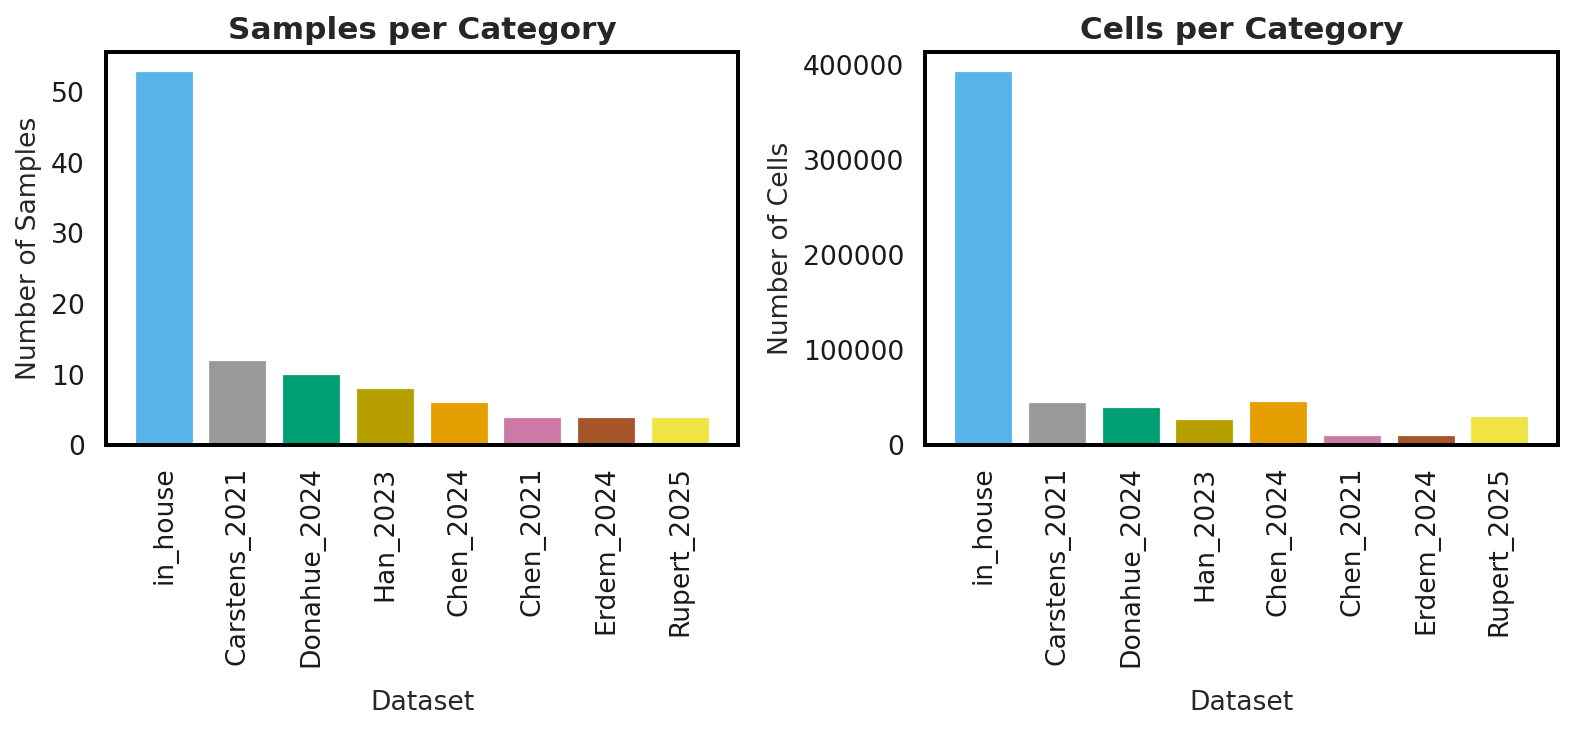

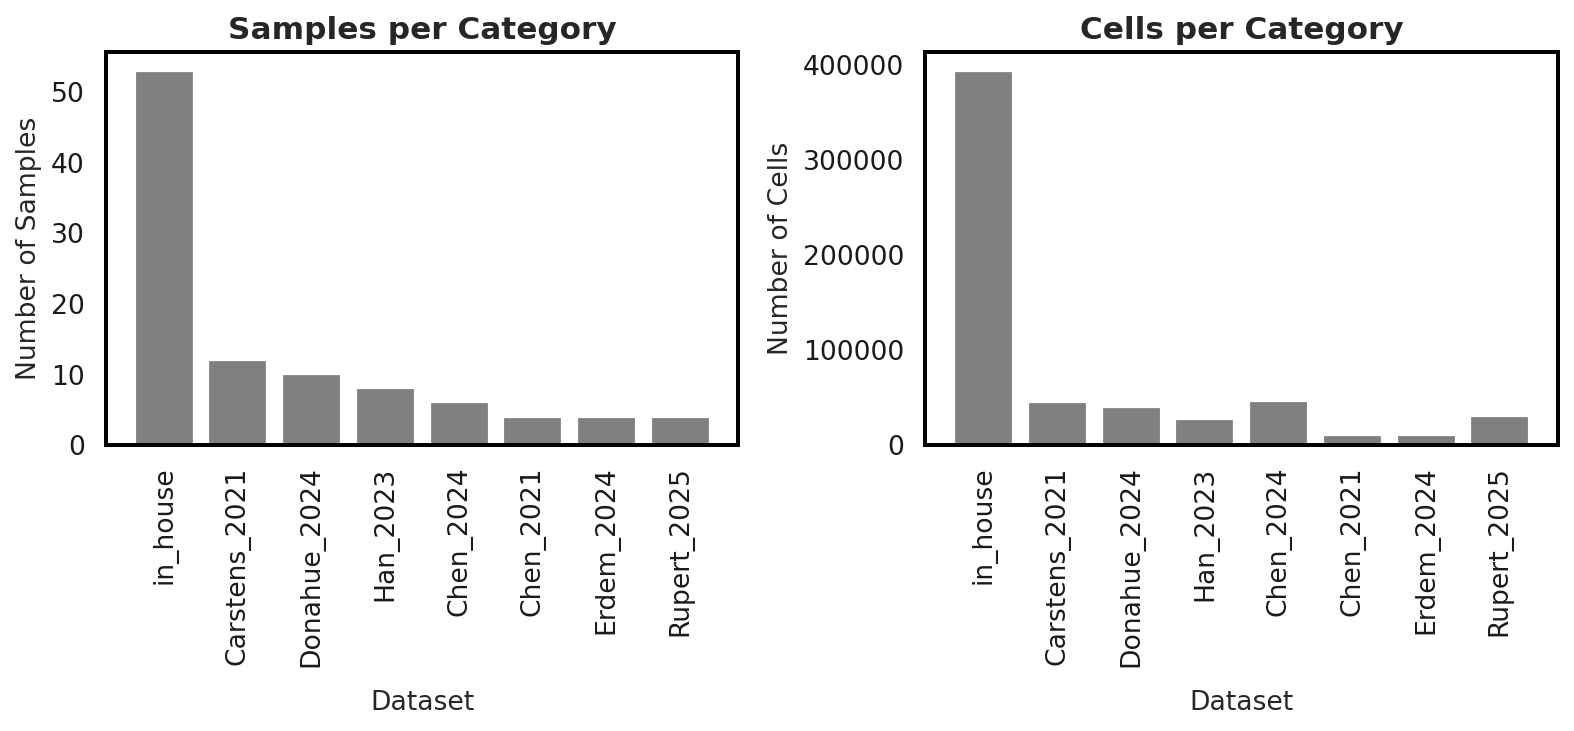

In [ ]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="Dataset",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_dataset",
    custom_palette=True
)


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_treatment_type.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_treatment_type_all_grey.png


(<Figure size 800x800 with 2 Axes>, <Figure size 800x800 with 2 Axes>)

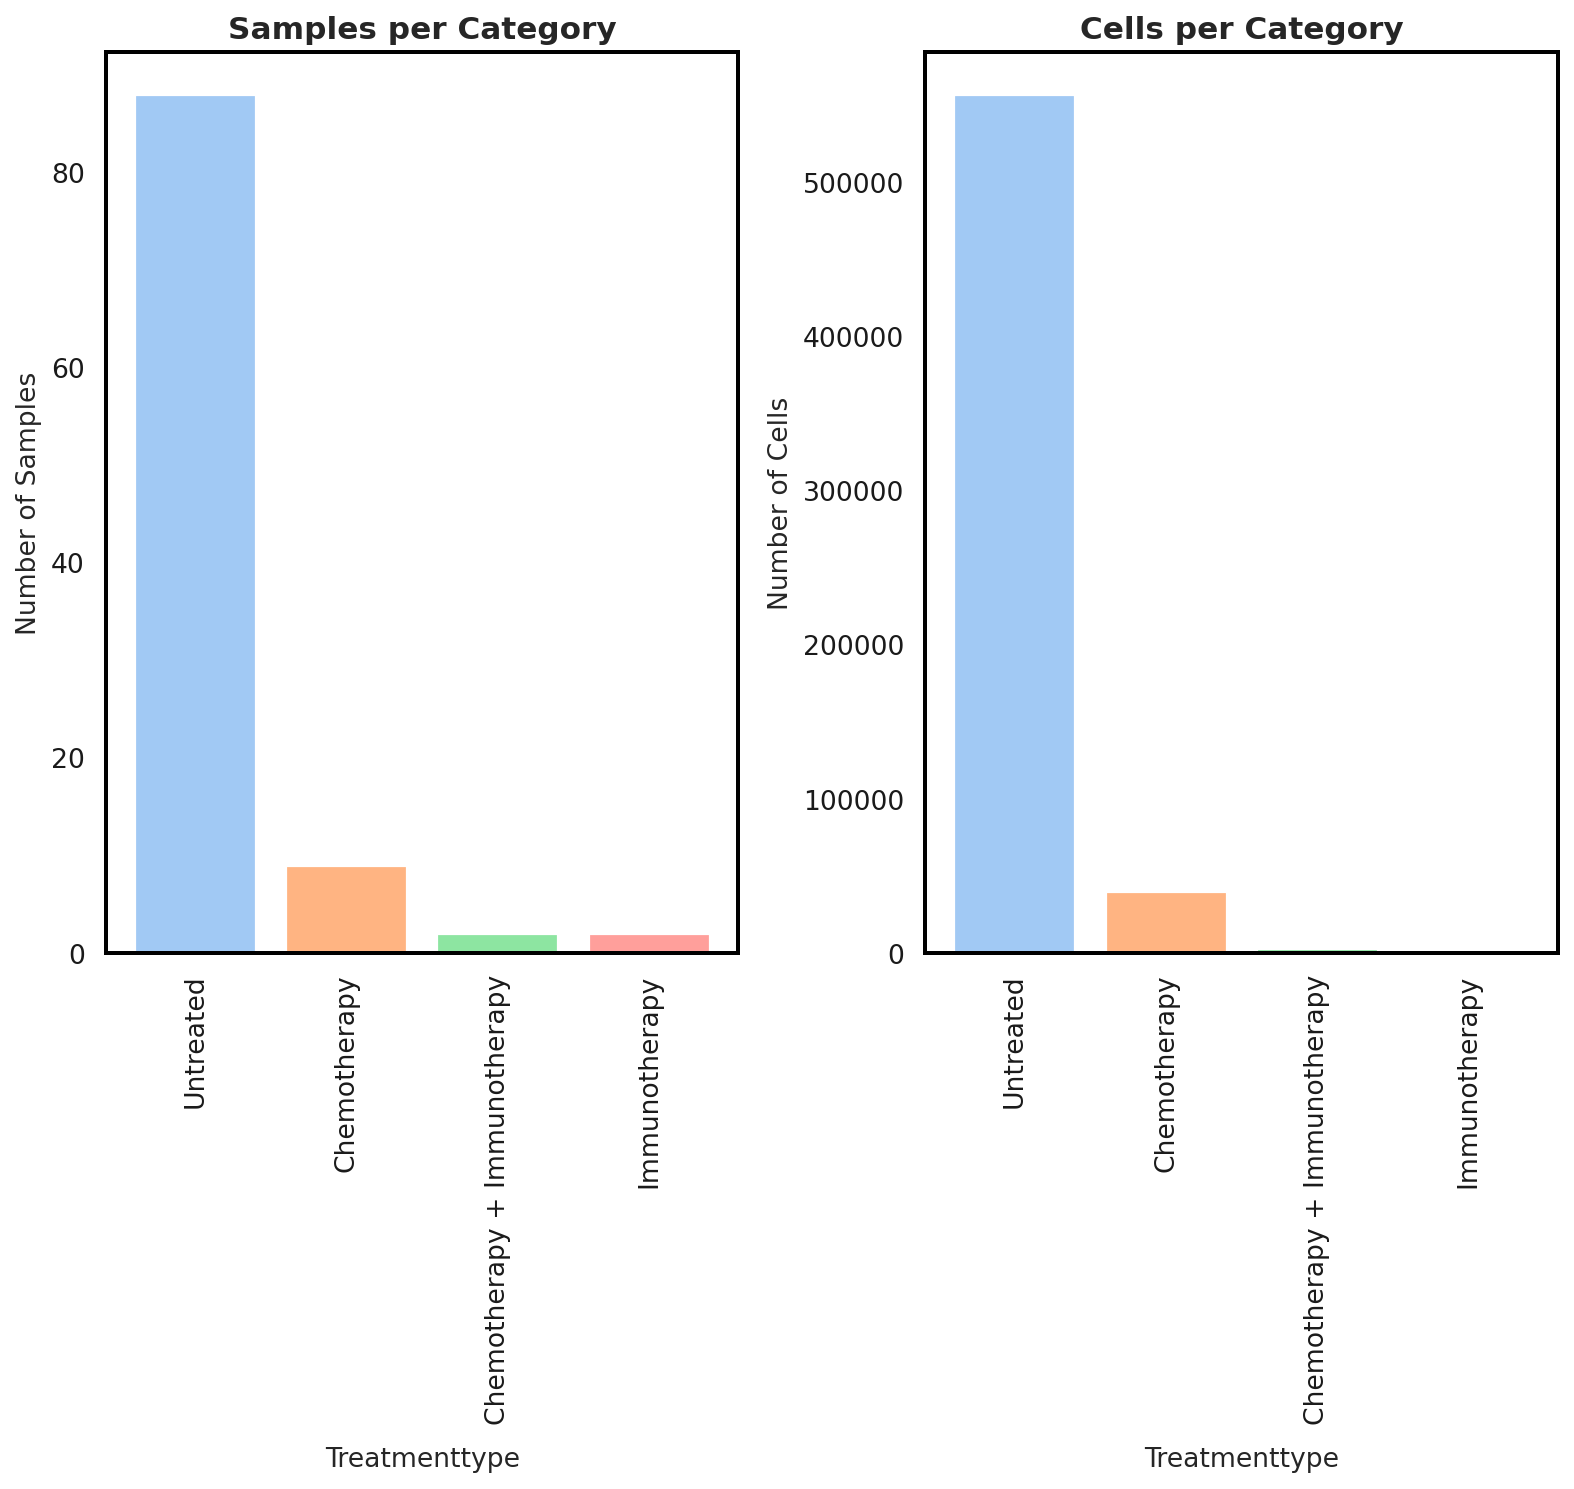

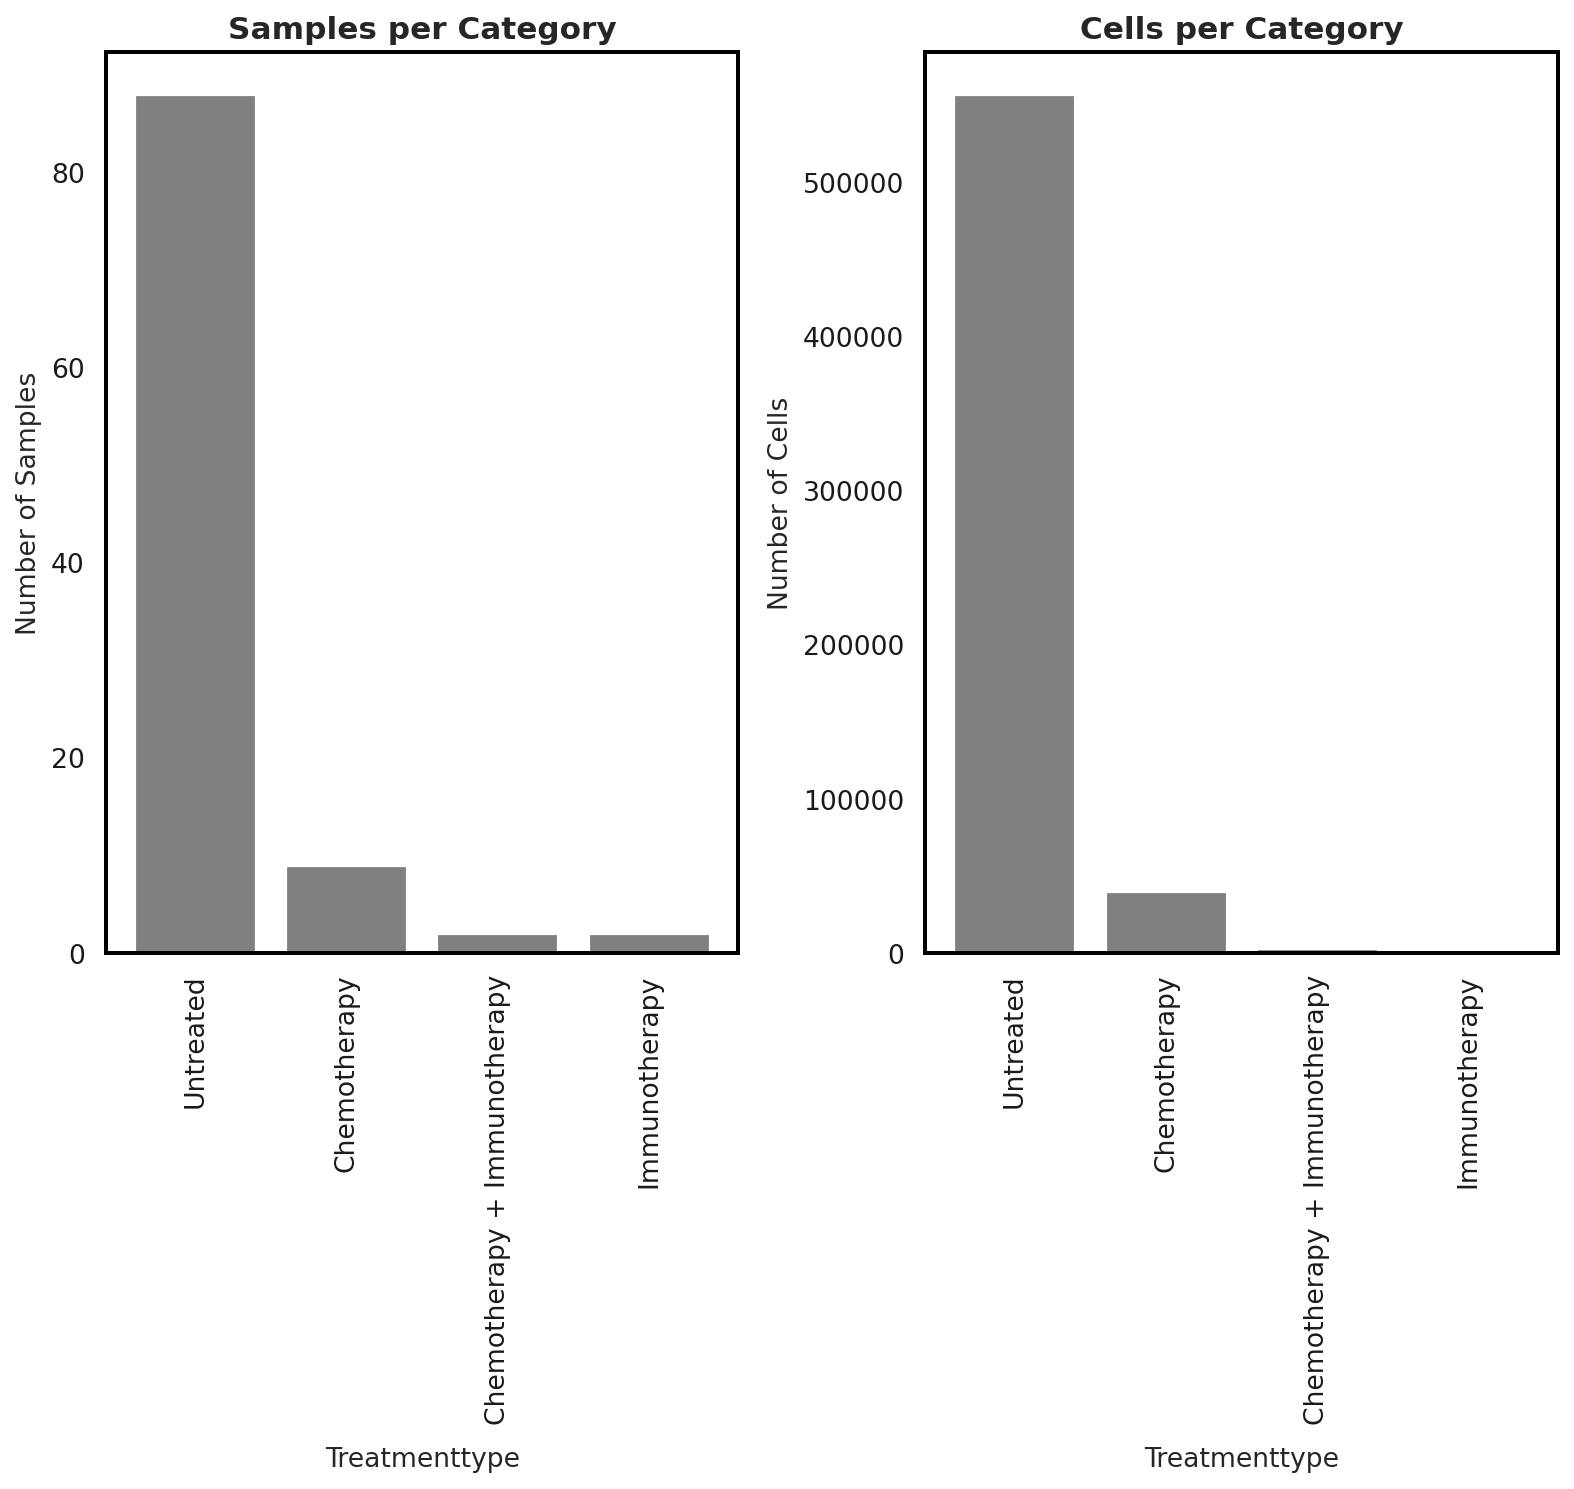

In [ ]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="TreatmentType",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_treatment_type",
    figsize=(10,10)
)


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_treatment_status.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_treatment_status_all_grey.png


(<Figure size 560x400 with 2 Axes>, <Figure size 560x400 with 2 Axes>)

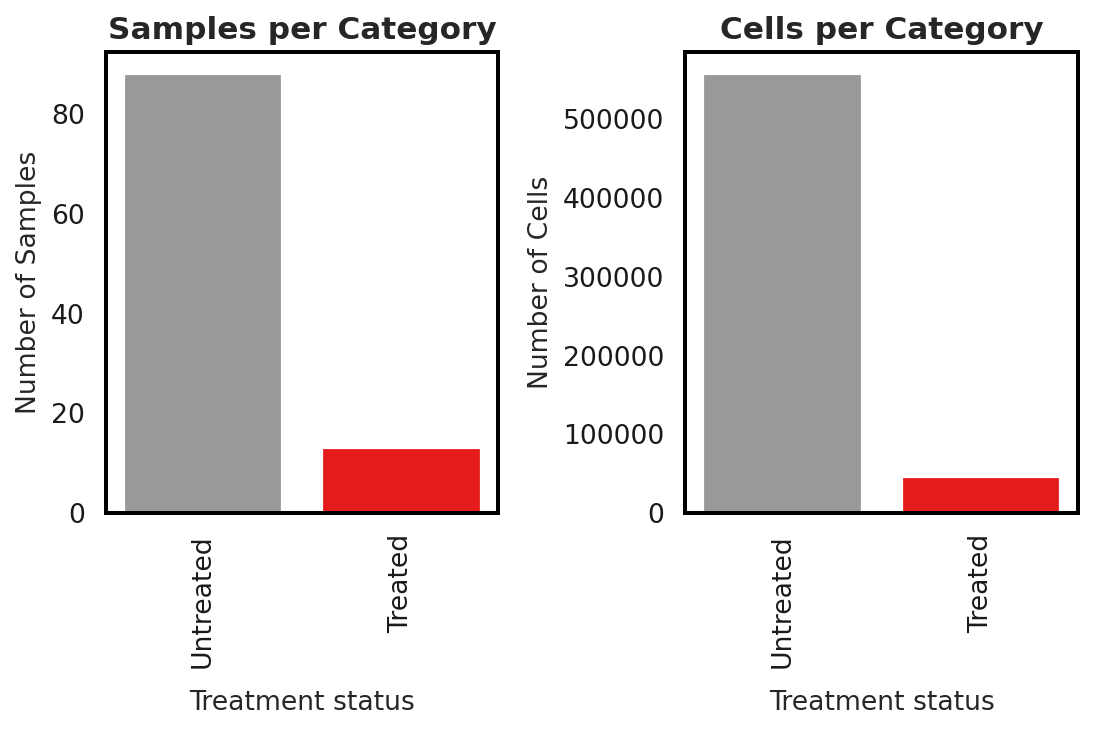

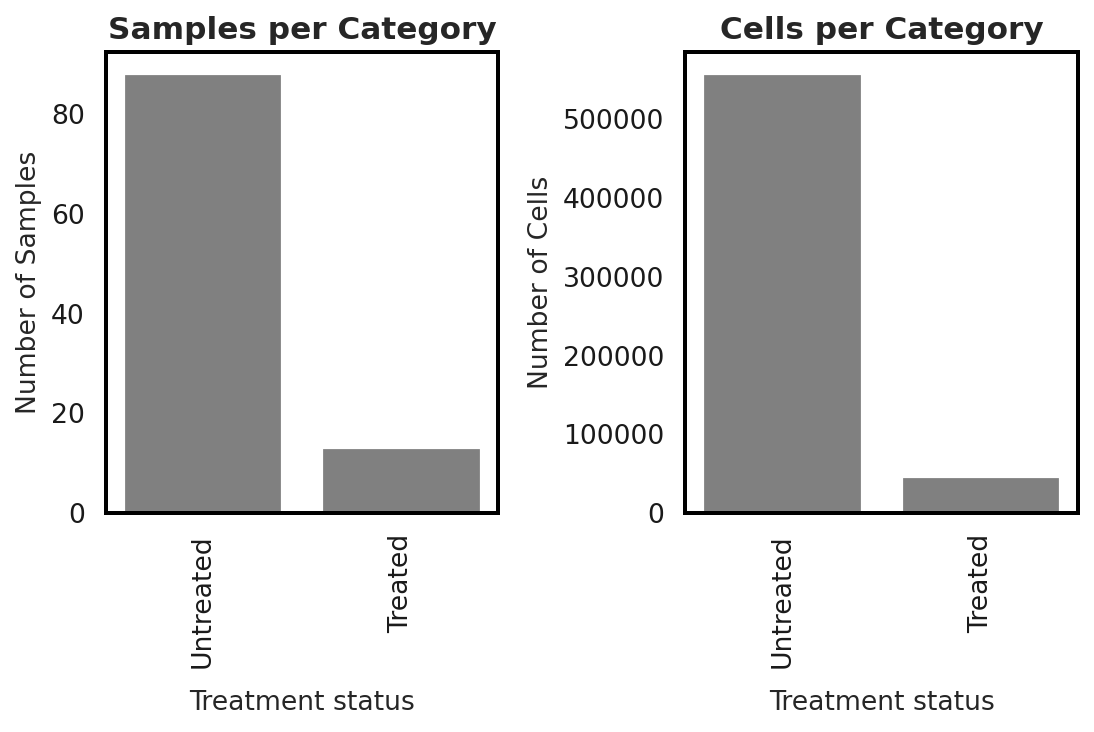

In [ ]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="TreatmentStatus",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_treatment_status",
    figsize=(7,5),
    custom_palette=True,
    xlabel="Treatment status"
)

Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_treatment_type.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_treatment_type_all_grey.png


(<Figure size 800x800 with 2 Axes>, <Figure size 800x800 with 2 Axes>)

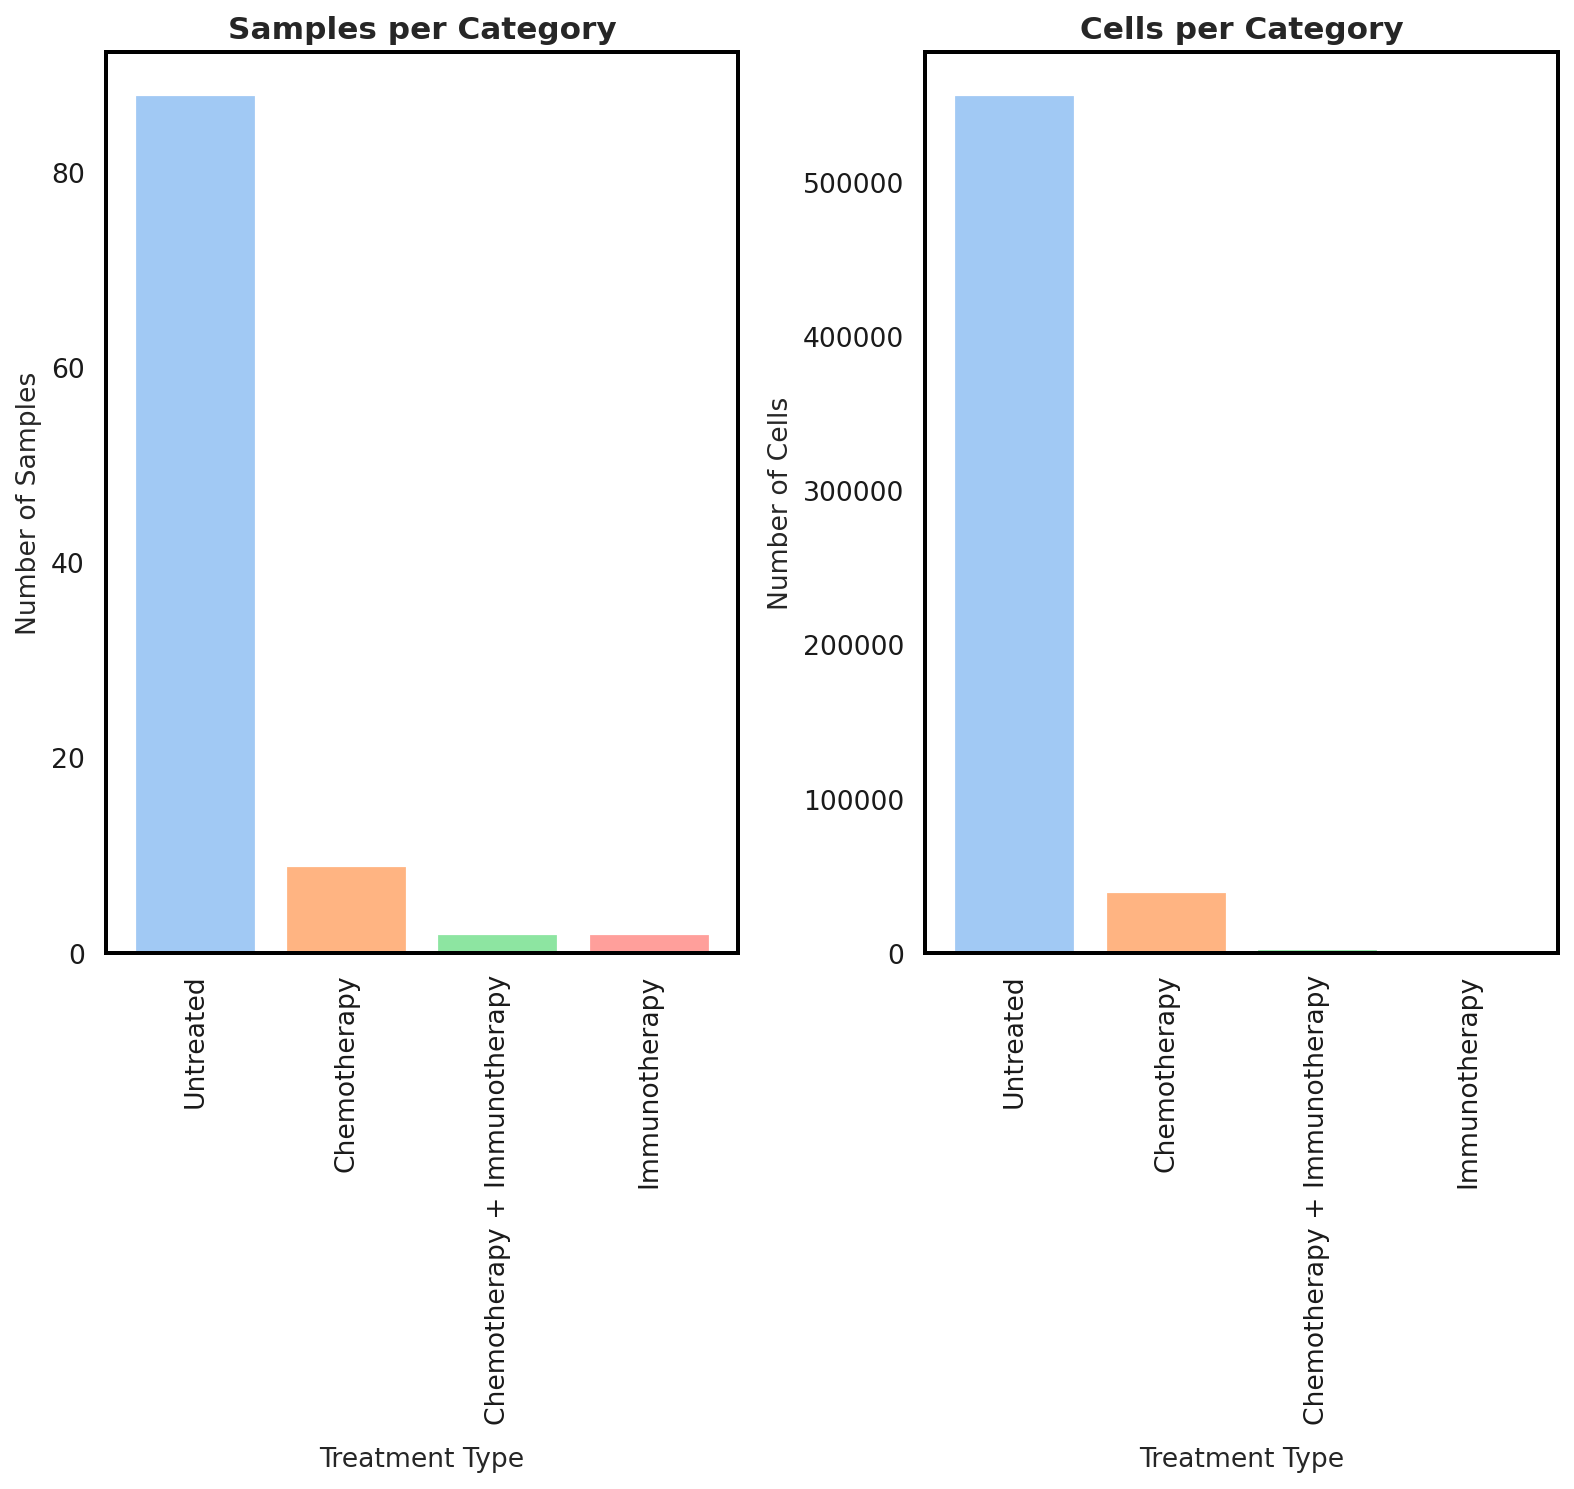

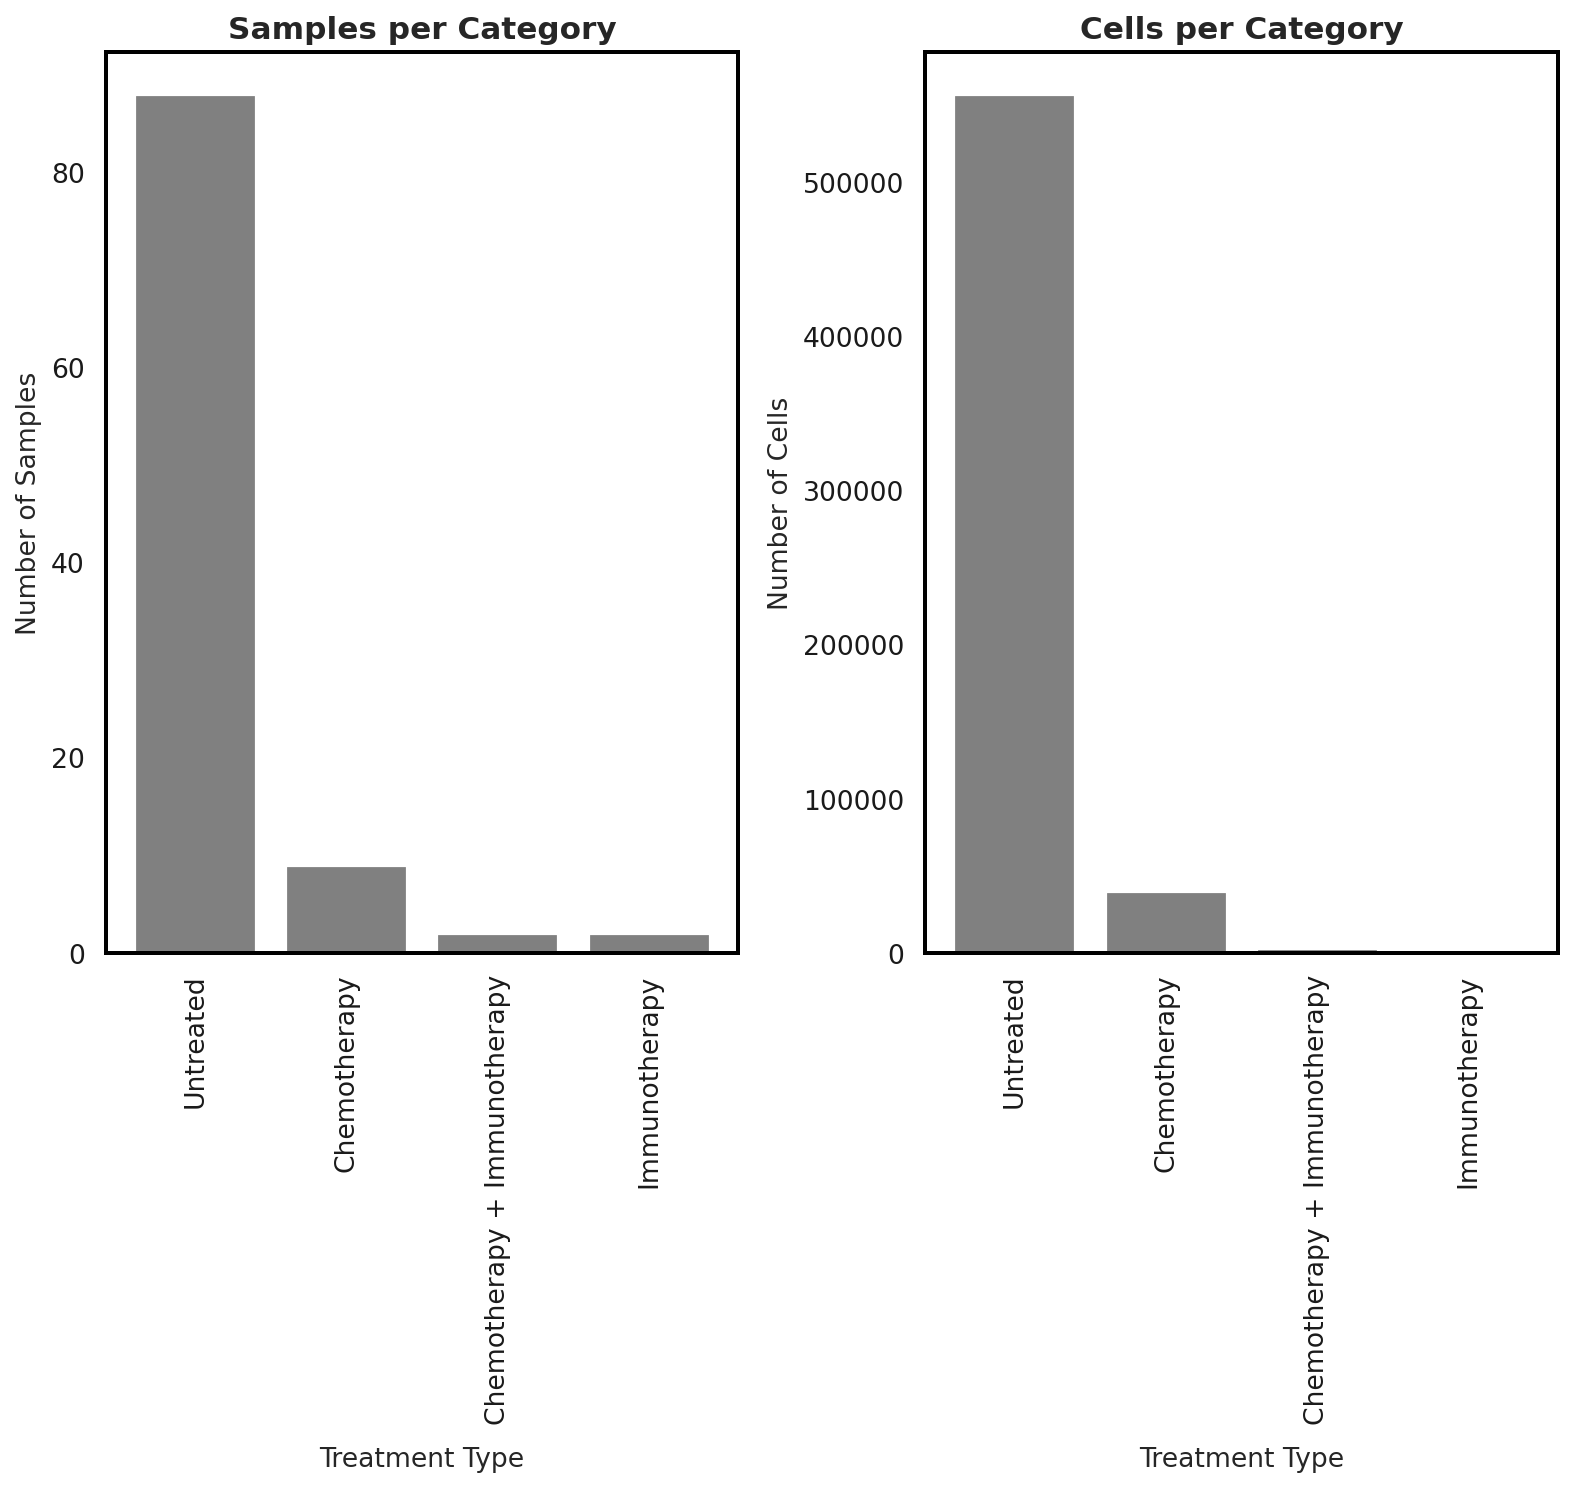

In [ ]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="TreatmentType",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_treatment_type",
    custom_palette=False,
    figsize=(10,10),
    xlabel="Treatment Type"
)

Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_in_house_public.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/sample_cell_counts/sample_cell_counts_in_house_public_all_grey.png


(<Figure size 560x400 with 2 Axes>, <Figure size 560x400 with 2 Axes>)

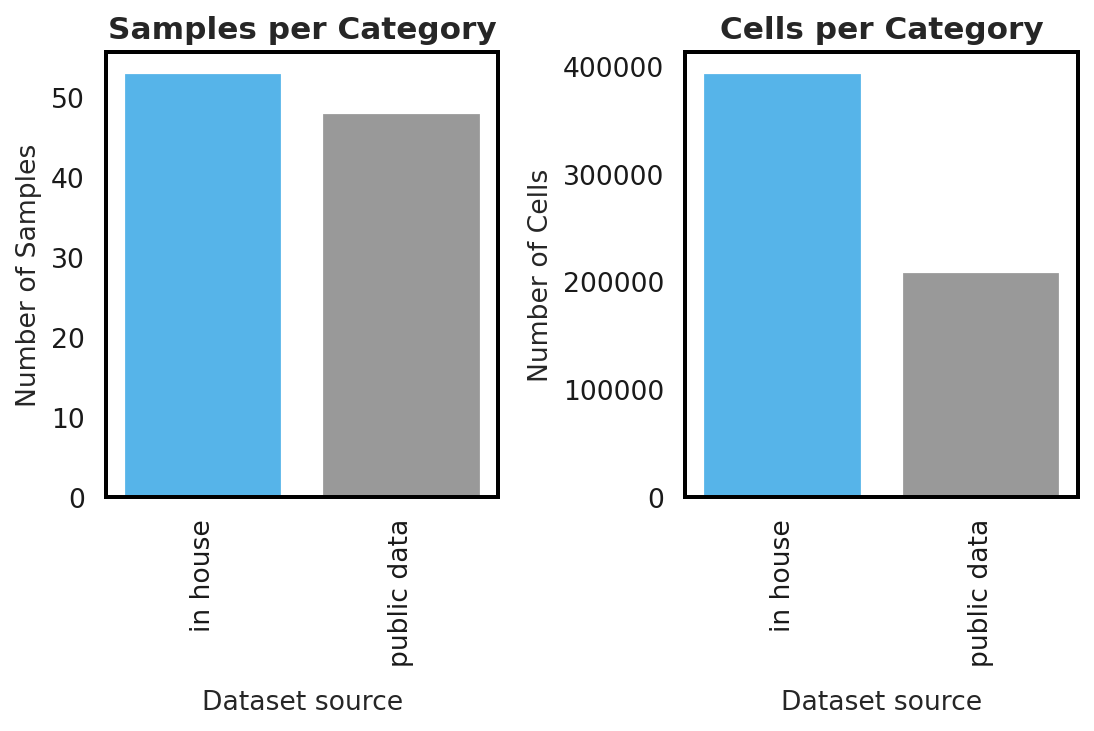

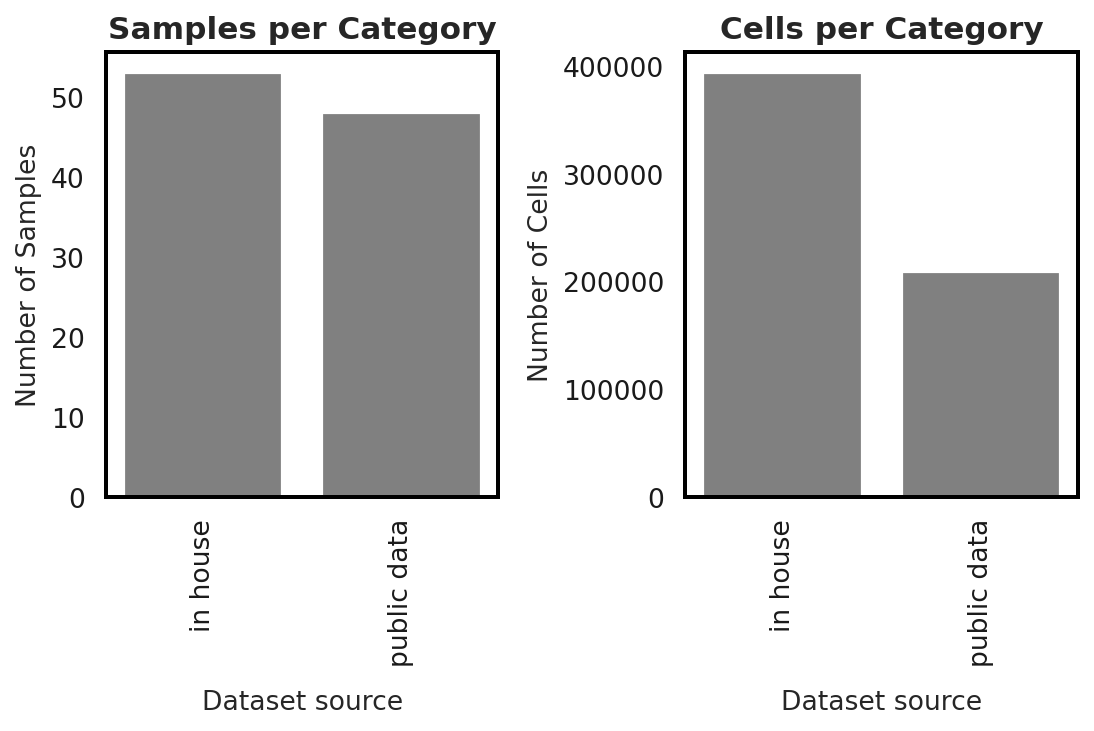

In [ ]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="Data_Source",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_in_house_public",
    custom_palette=True,
    figsize=(7,5),
    xlabel="Dataset source"
)


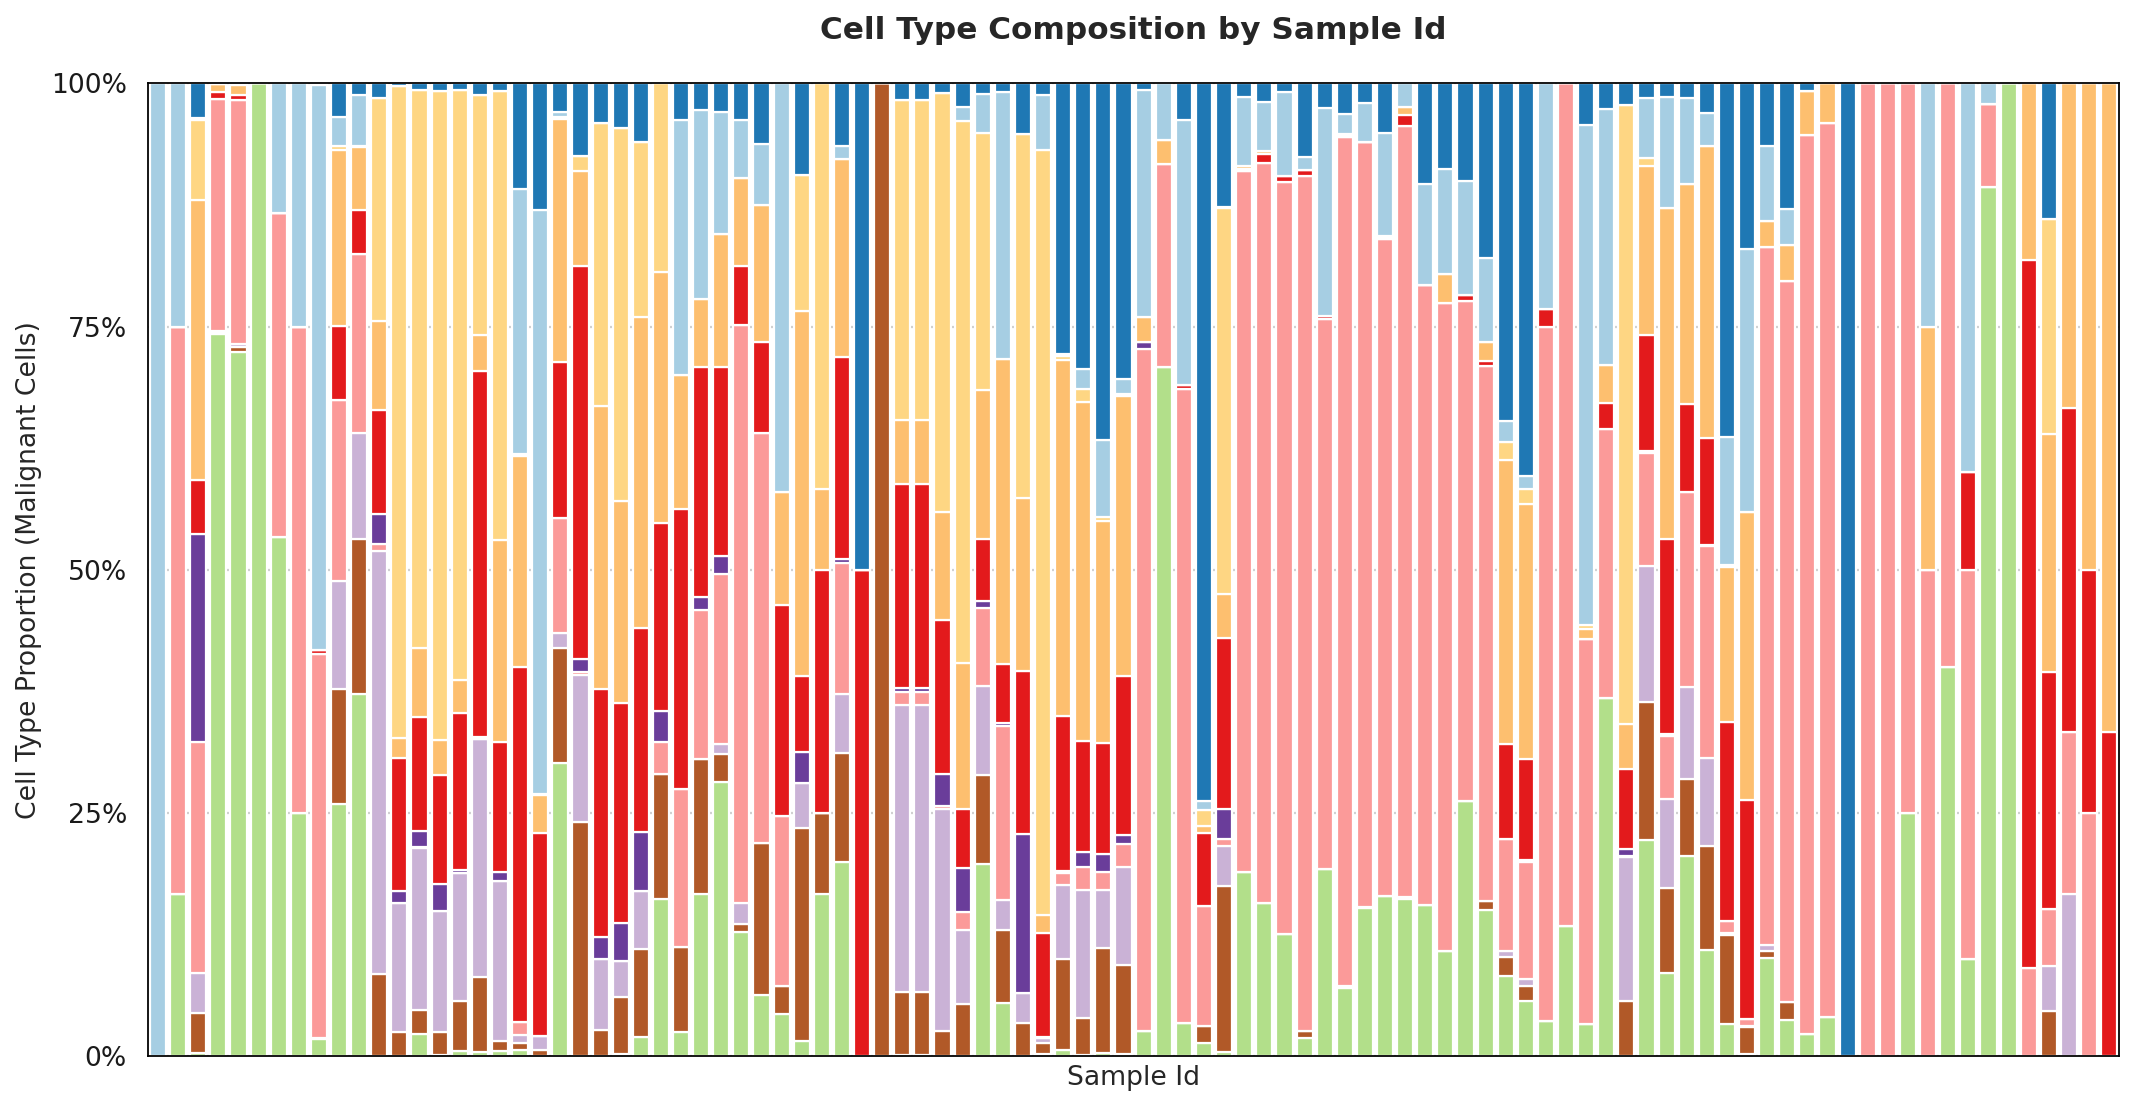

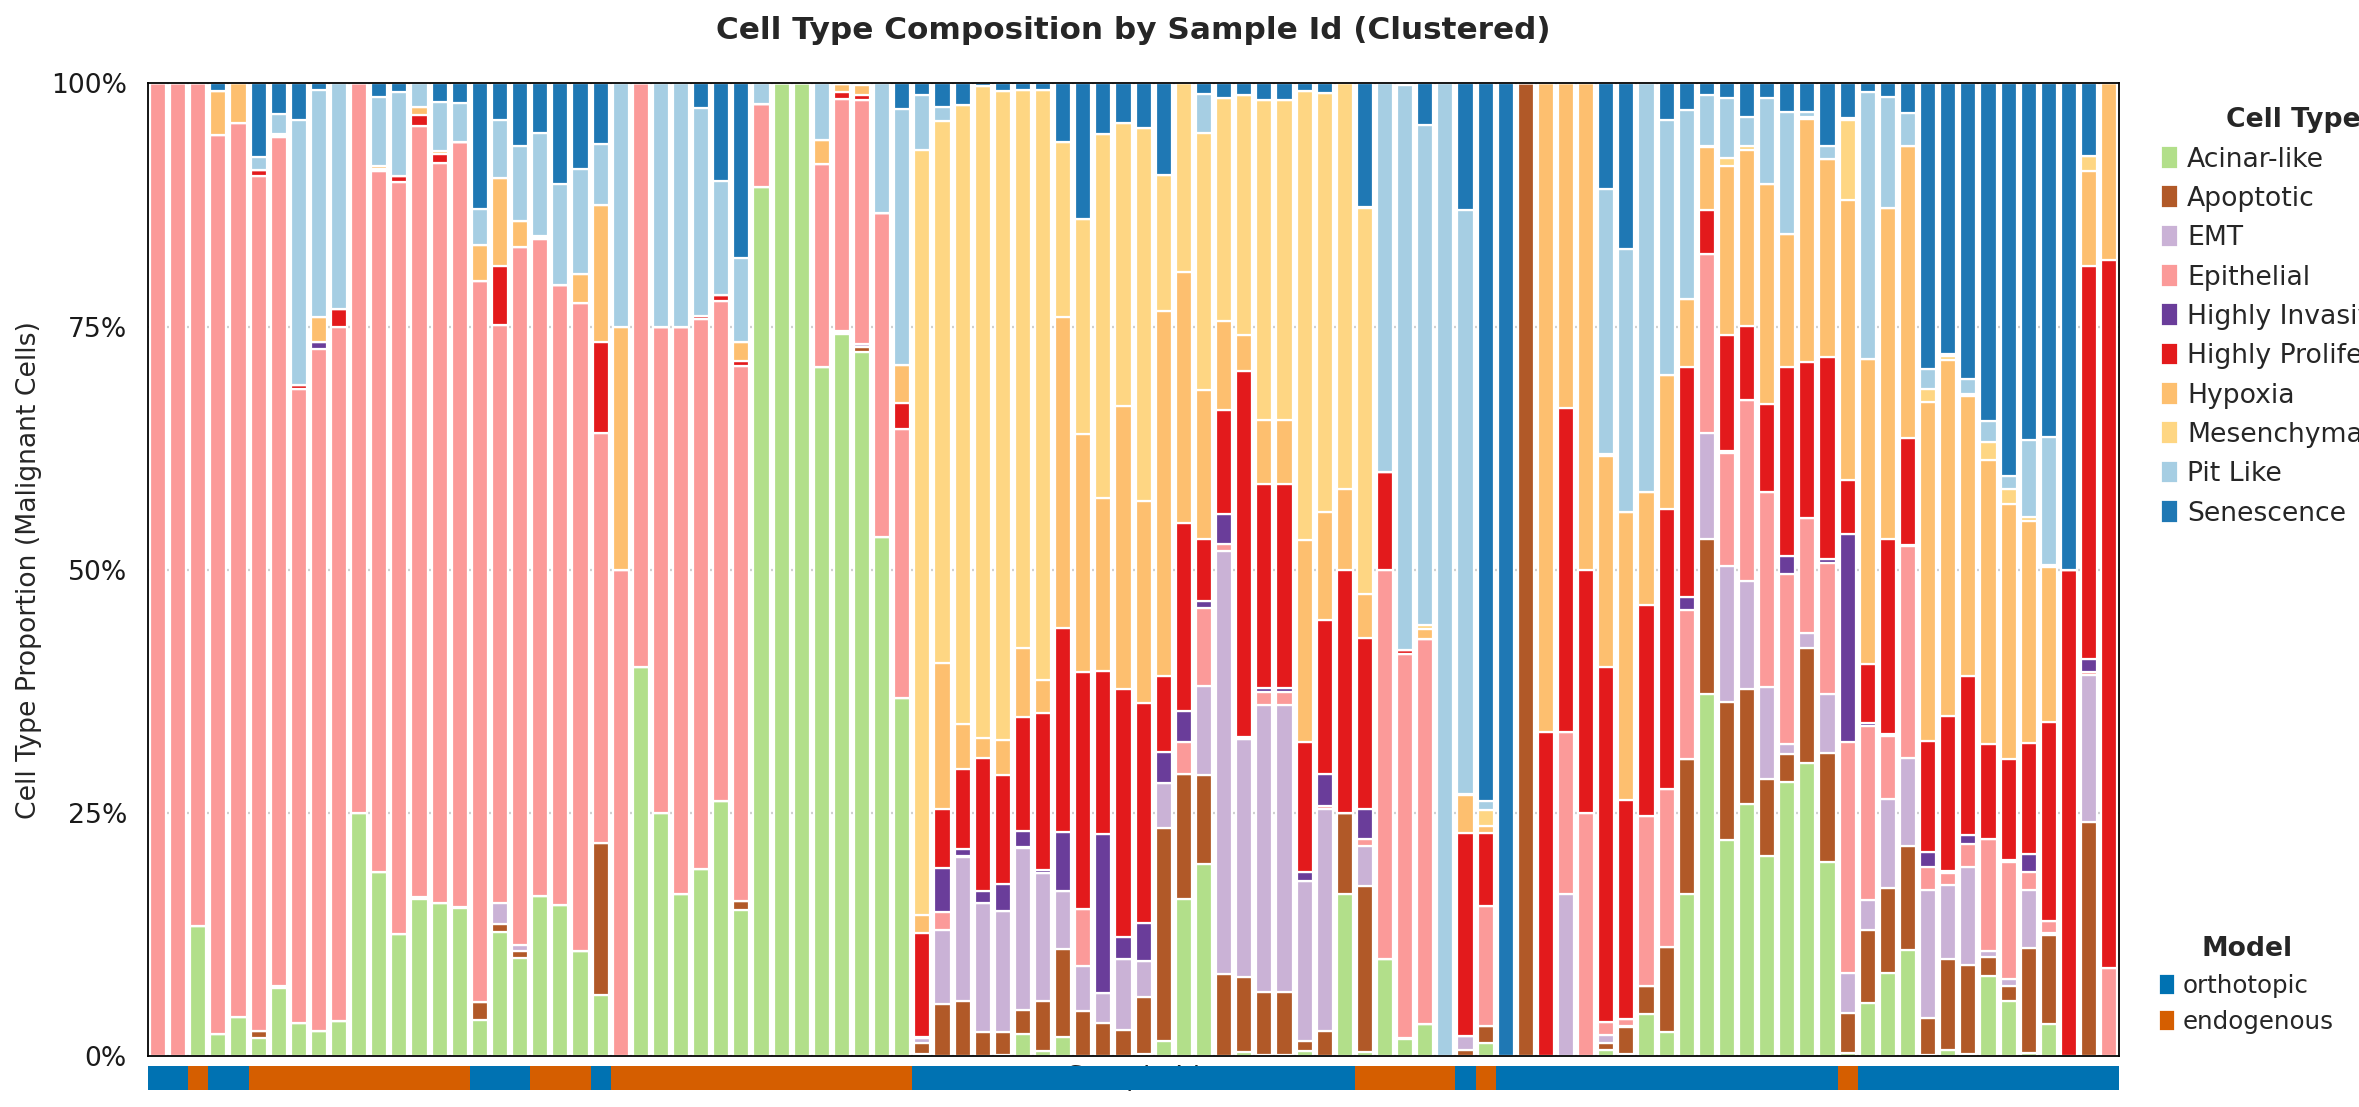

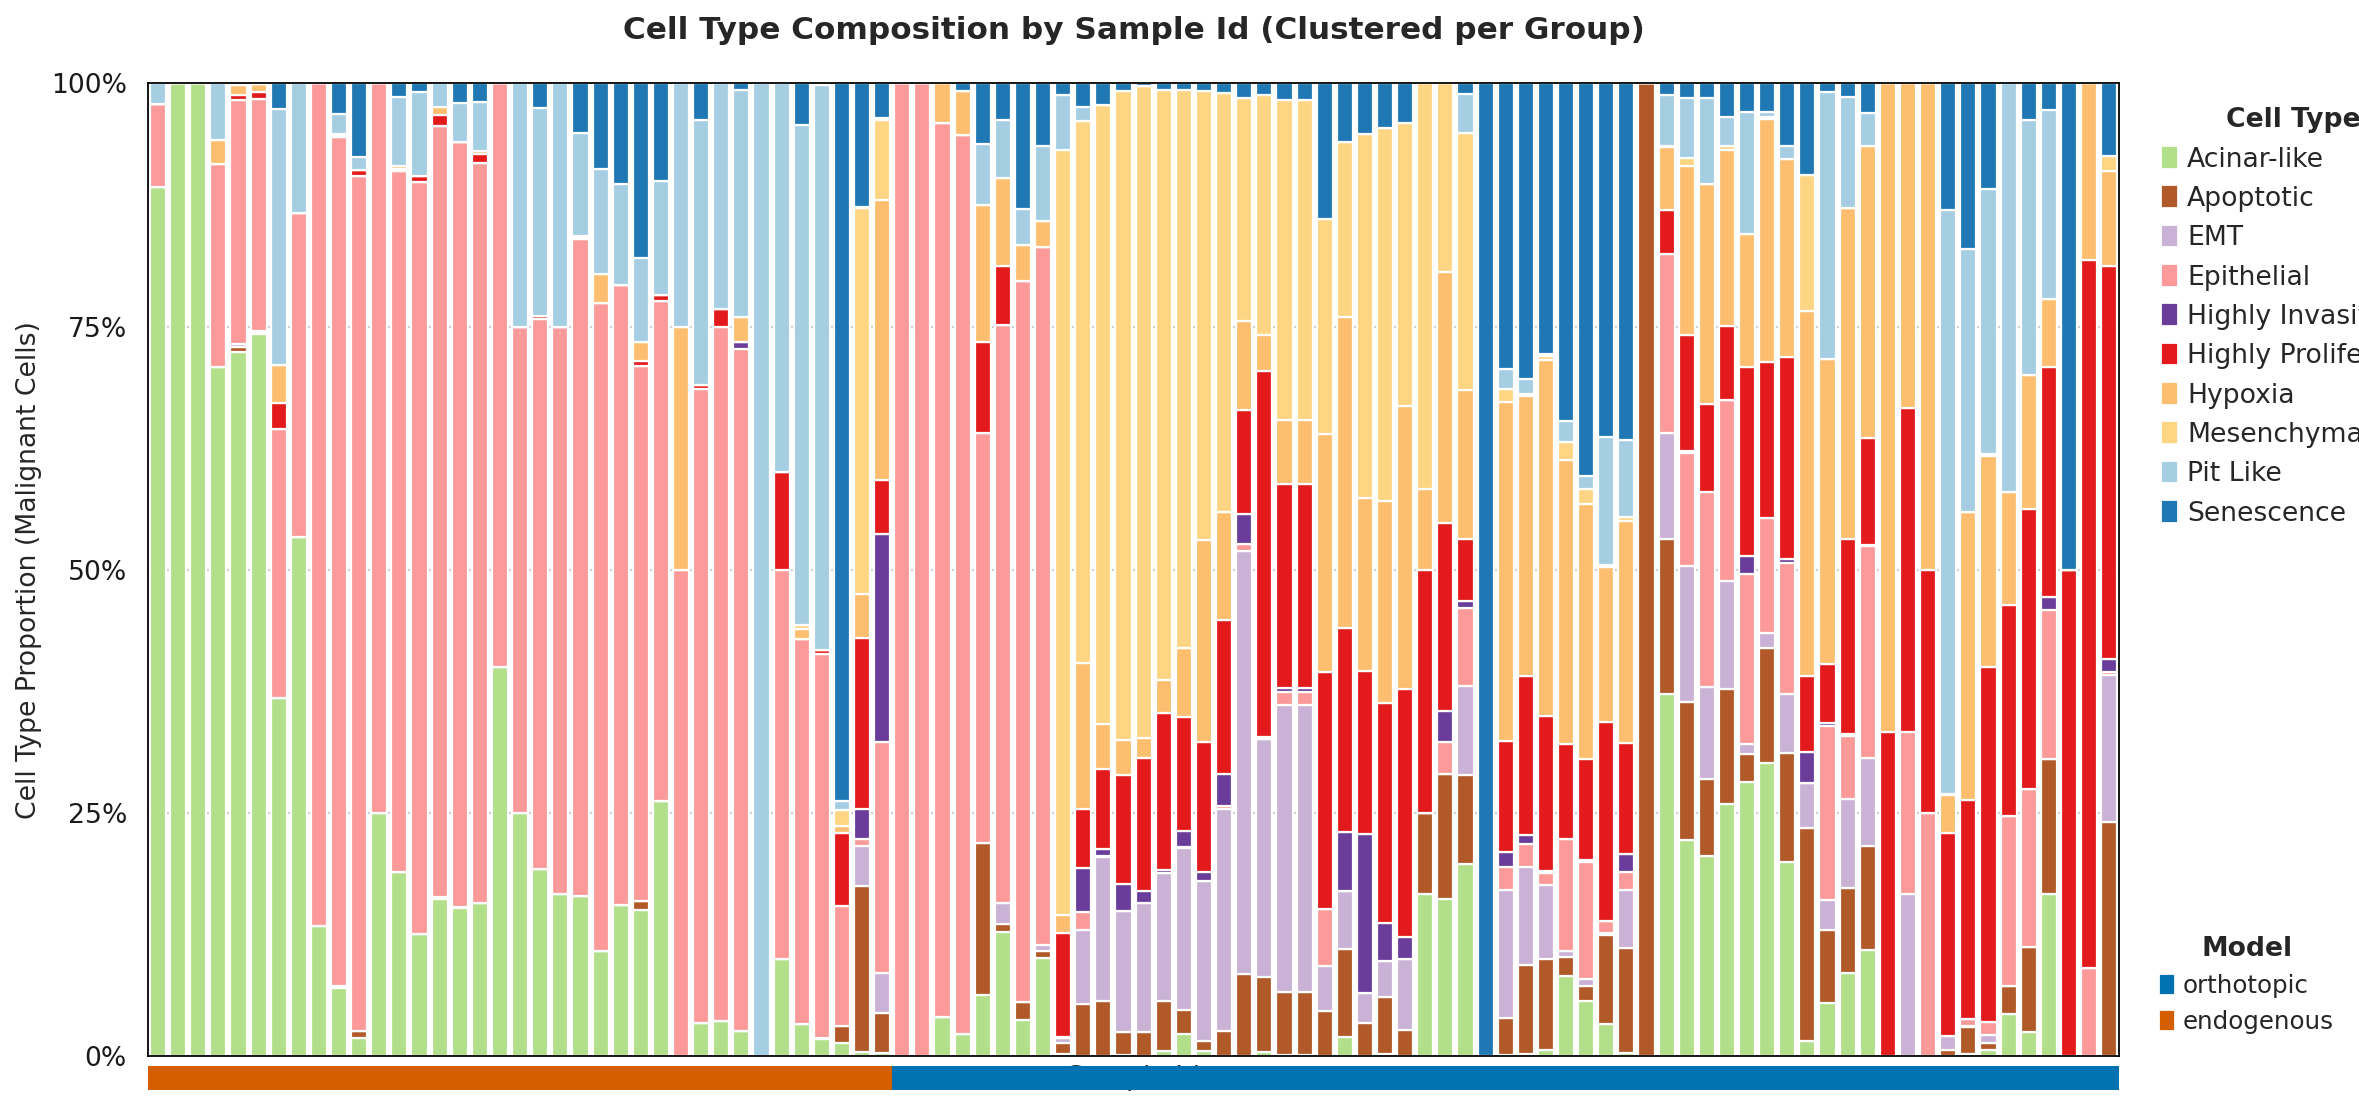

In [ ]:
fig = figgen.create_all_stacked_barplots(
    adata, 
    level_column='Level_4',
    subset_level='Level_2',
    subset_value="Malignant Cell",
    order_by_column='Model',
    save_name_prefix='malignant_cells_composition'
)

Subset to 129233 cells with Level_2 in ['Malignant Cell']


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/compositional_plot/malignant_cells_composition_heatmap.png


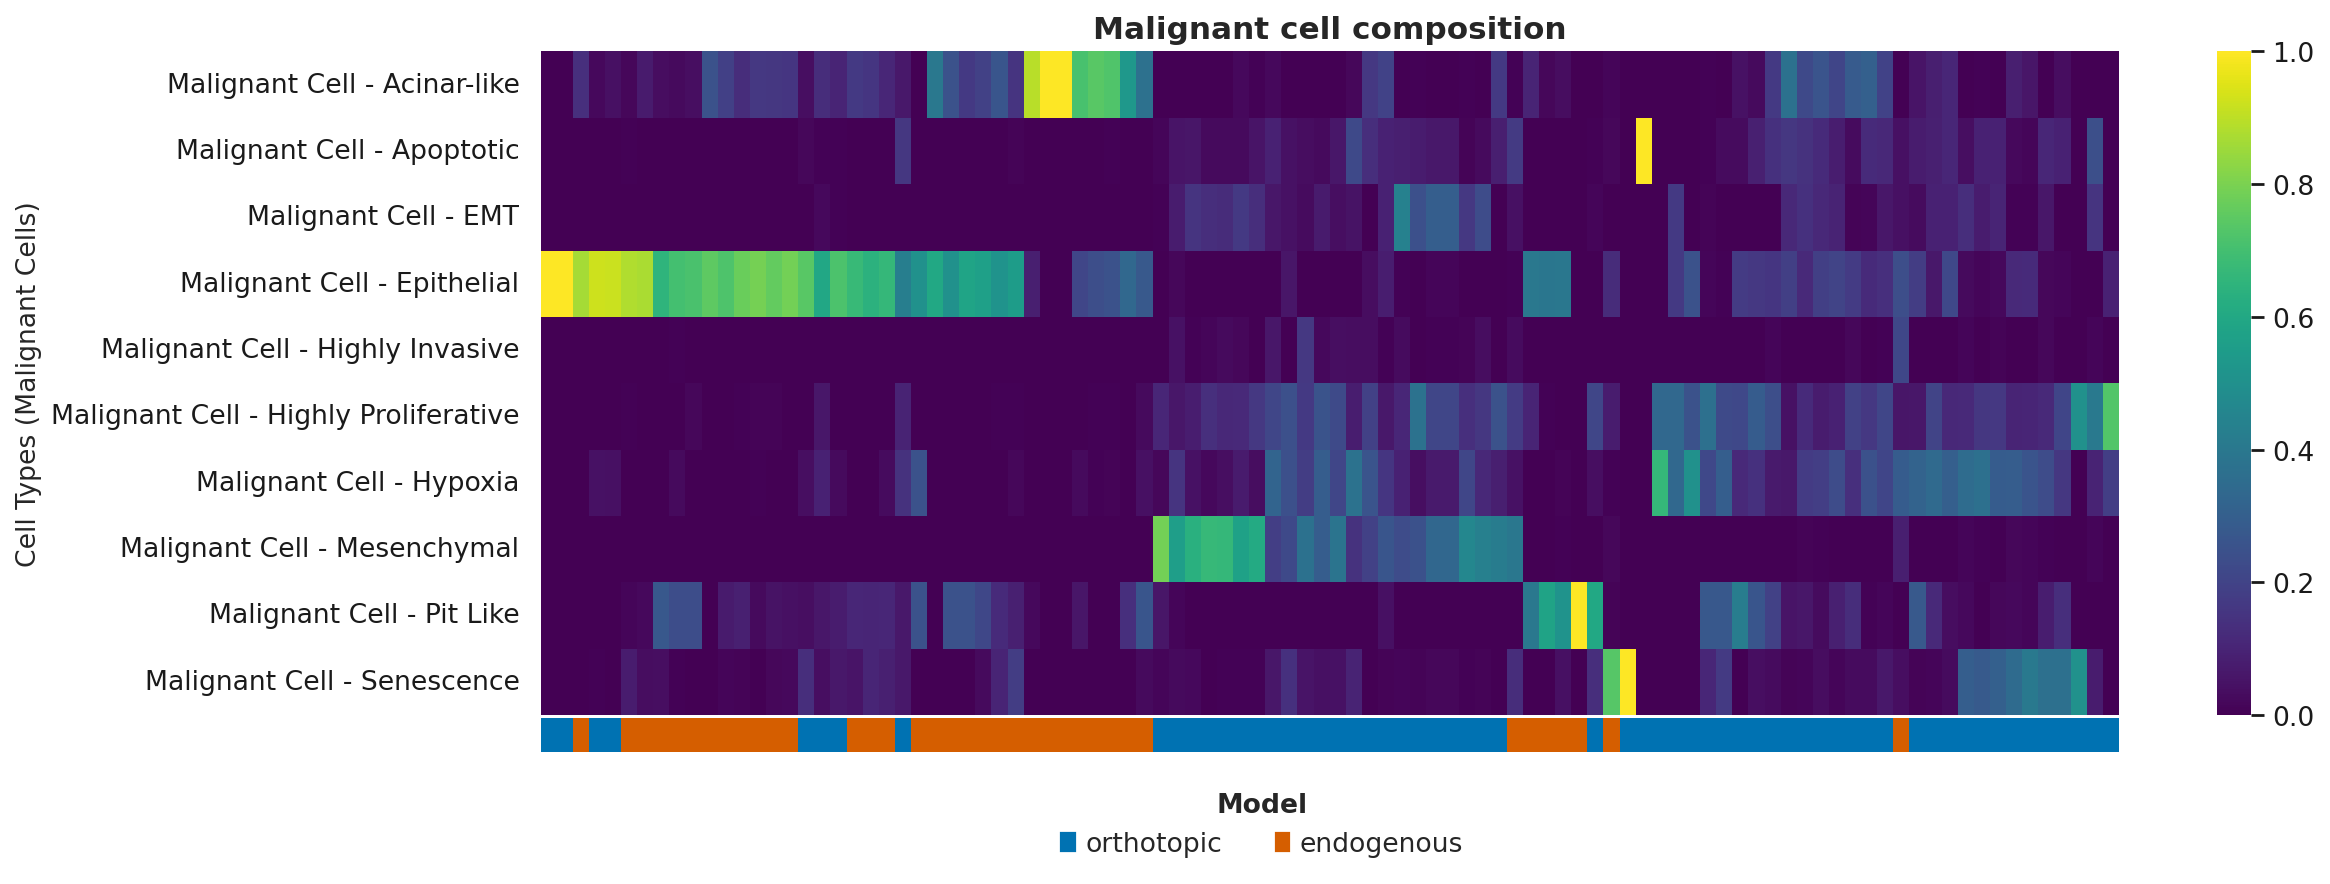

In [ ]:
fig = figgen.composition_heatmap(
        adata, 
    level_column='Level_4',
    subset_level='Level_2',
    subset_value="Malignant Cell",
    order_by_column='Model',
    title='Malignant cell composition',
    save_name='malignant_cells_composition_heatmap',
    figsize=(16,5)
)

In [ ]:
sc.settings.figdir = "/mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure5/scanpy_umaps/"

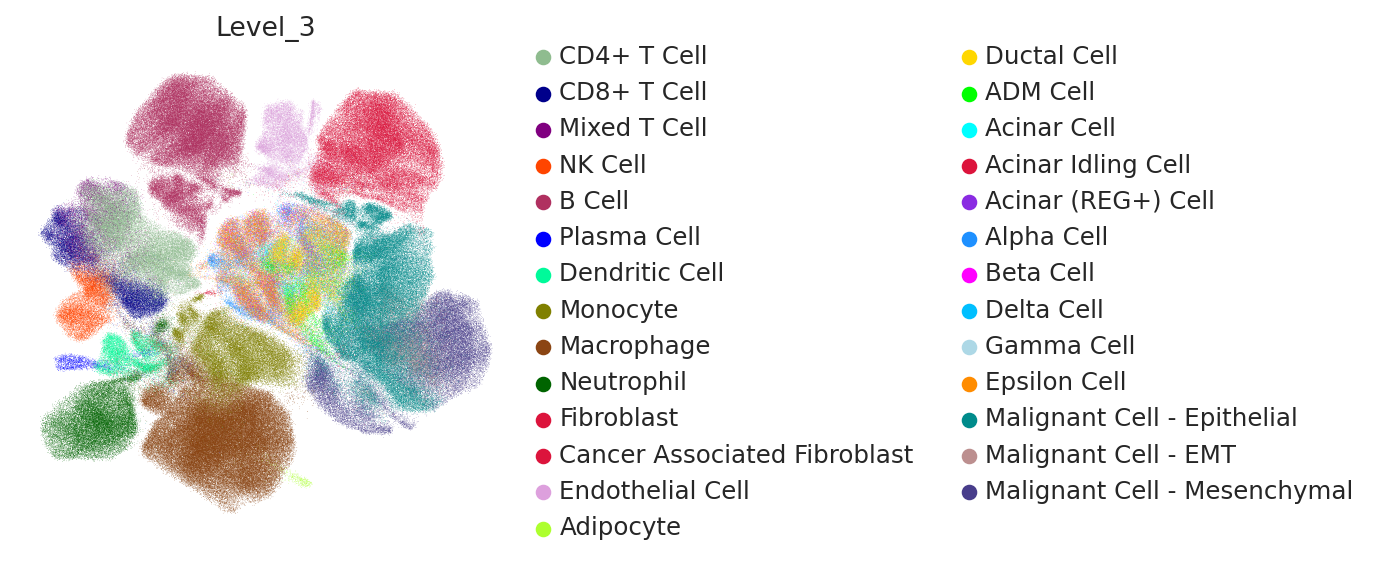

<Axes: title={'center': 'Level_3'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="Level_3",frameon=False,palette=figgen.config["palettes"]["Level_3"],save="_level3_coloured.png")
sc.pl.umap(adata,color="Level_3",frameon=False,legend_loc=None,show=False,palette=figgen.config["palettes"]["Level_3"],save="_level3_coloured_nolegend.png")

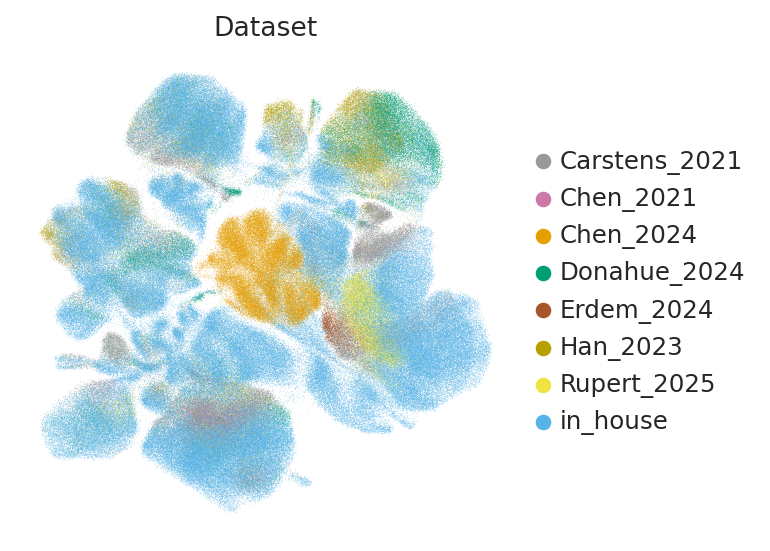

<Axes: title={'center': 'Dataset'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="Dataset",palette=figgen.config["palettes"]["Dataset"],frameon=False,save="_Dataset_coloured.png")
sc.pl.umap(adata,color="Dataset",palette=figgen.config["palettes"]["Dataset"],frameon=False,legend_loc=None,show=False,save="_Dataset_coloured_nolegend.png")

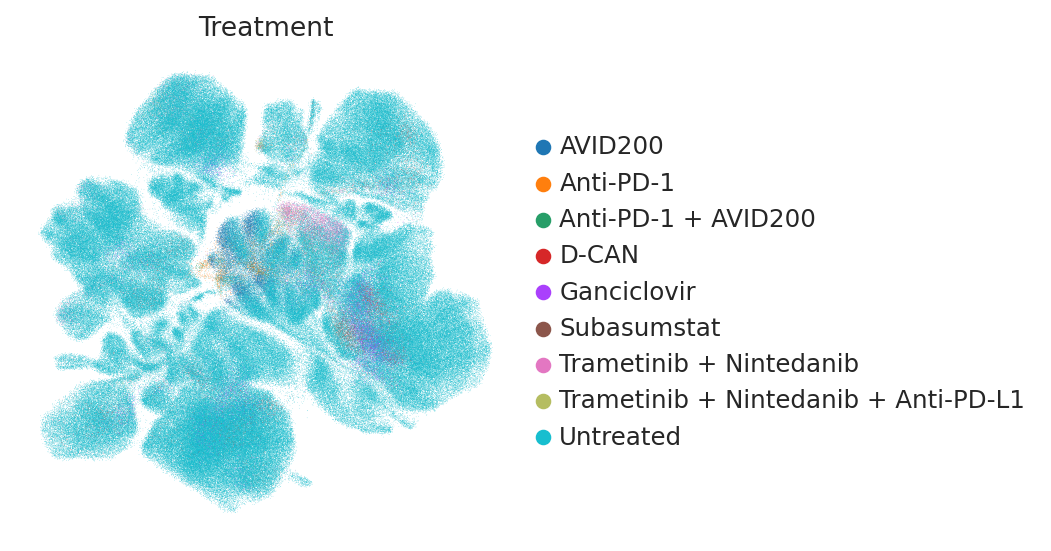

<Axes: title={'center': 'Treatment'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="Treatment",frameon=False,save="_treatment_coloured.png")
sc.pl.umap(adata,color="Treatment",frameon=False,legend_loc=None,show=False,save="_Treatment_coloured_nolegend.png")

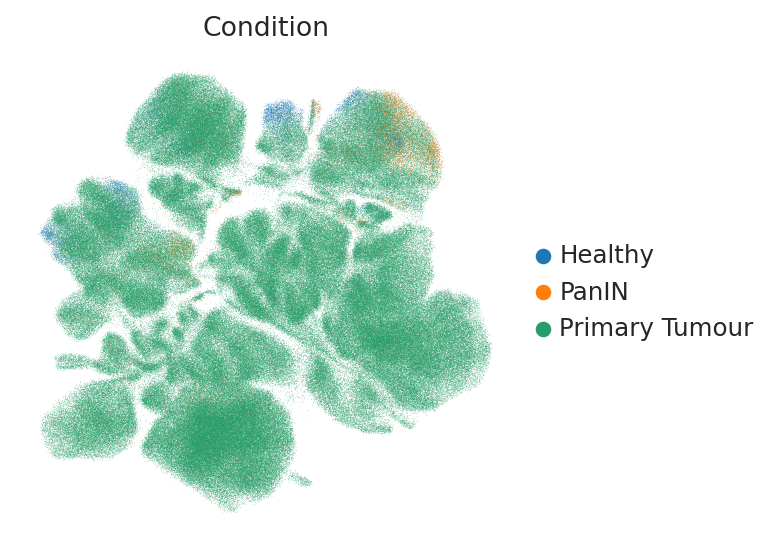

<Axes: title={'center': 'Condition'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="Condition",frameon=False,save="_Condition_coloured.png")
sc.pl.umap(adata,color="Condition",frameon=False,legend_loc=None,show=False,save="_Condition_coloured_nolegend.png")

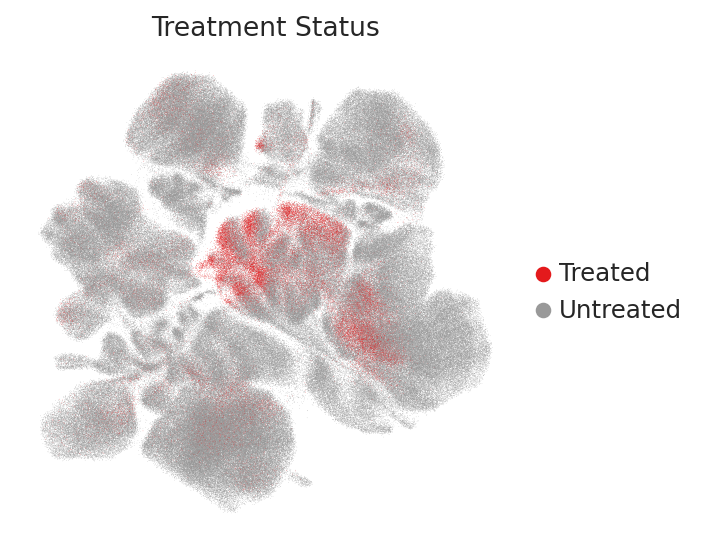

<Axes: title={'center': 'Treatment Status'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="TreatmentStatus",palette=figgen.config["palettes"]["TreatmentStatus"],title="Treatment Status",frameon=False,save="_TreatmentStatus_coloured.png")
sc.pl.umap(adata,color="TreatmentStatus",palette=figgen.config["palettes"]["TreatmentStatus"],title="Treatment Status",frameon=False,legend_loc=None,show=False,save="_Condition_coloured_nolegend.png")

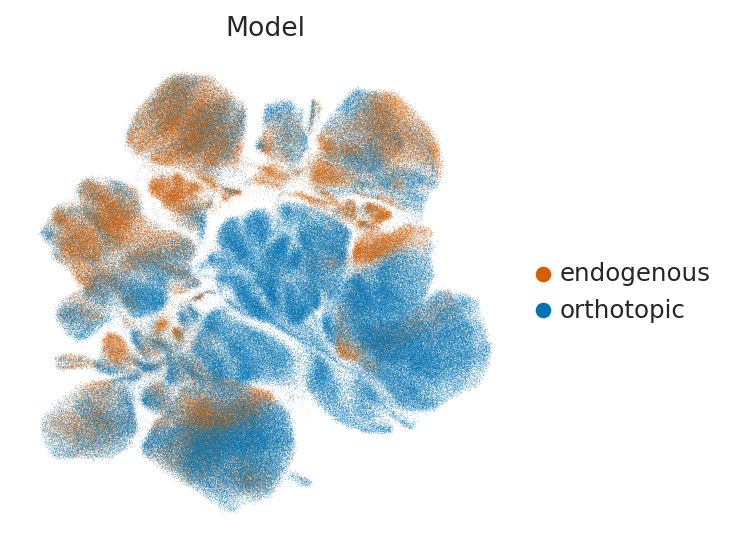

<Axes: title={'center': 'Model'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="Model",palette=figgen.config["palettes"]["Model"],title="Model",frameon=False,save="_Model_coloured.png")
sc.pl.umap(adata,color="Model",palette=figgen.config["palettes"]["Model"],title="Model",frameon=False,legend_loc=None,show=False,save="_Model_coloured_nolegend.png")

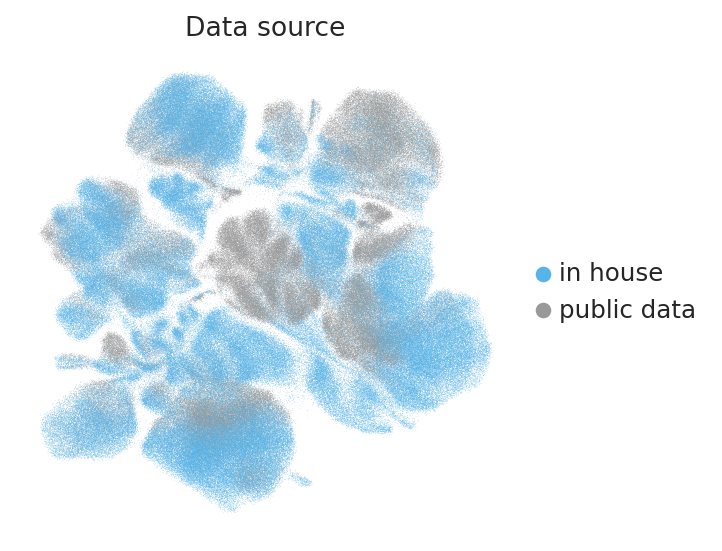

<Axes: title={'center': 'Data source'}, xlabel='UMAP1', ylabel='UMAP2'>

In [ ]:
sc.pl.umap(adata,color="Data_Source",palette=figgen.config["palettes"]["Data_Source"],title="Data source",frameon=False,save="_Data_Source_coloured.png")
sc.pl.umap(adata,color="Data_Source",palette=figgen.config["palettes"]["Data_Source"],title="Data source",frameon=False,legend_loc=None,show=False,save="_Data_Source_coloured_nolegend.png")